In [2]:
from glob import glob

from matplotlib import pyplot as plt
import seaborn as sns

import pickle
import numpy as np


In [117]:
region = 'itc'

data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}
basedir = 'G:/Results/SUA/dec/c-ovr-final/time-time'

for fname in glob(f'{basedir}\c-ovr-r-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category].append(np.mean(dpr[region][category], 0))

for fname in glob(f'{basedir}\c-ovr-p-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category+"0"].append(np.mean(dpr[region][category], 0))

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

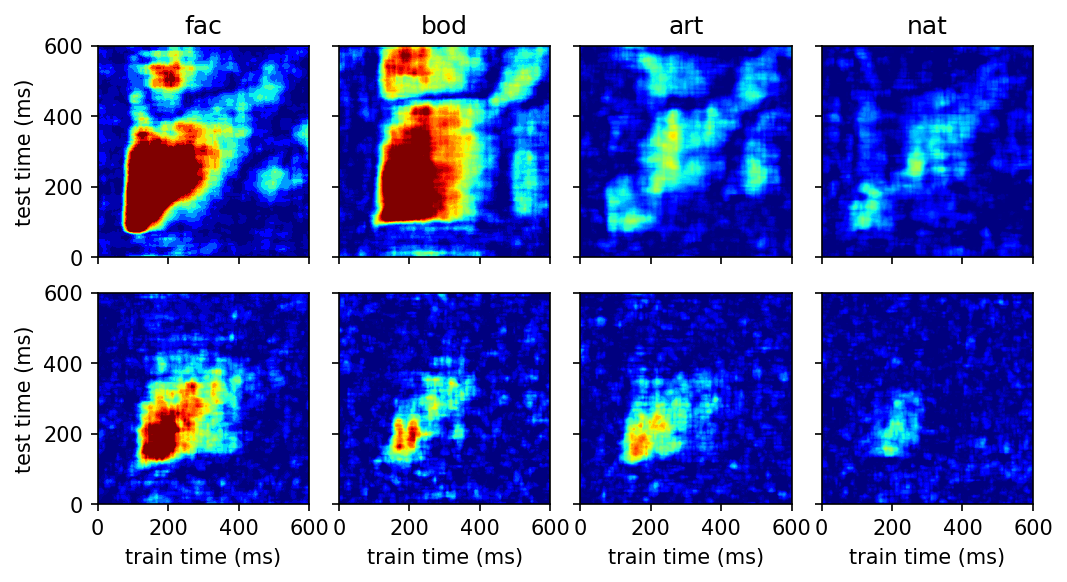

In [122]:
cm = 1 / 2.54
tim = np.arange(-200, 675, step=5) + 12.5
fig, axs = plt.subplots(2, 4, figsize=(18 * cm, 10 * cm), dpi=150, sharey=True, sharex=True, squeeze=False)
axs = axs.flatten()

tim = np.arange(-200, 675, step=5) + 12.5

for ax, category in zip(axs[:4], ['fac', 'bod', 'art', 'nat']):
    Z = data['itc'][category].mean(0) - data['itc'][category+"0"].mean(0)
    im = ax.contourf(tim, tim, Z, levels=50, cmap='jet', vmin=0, vmax=.1)
    # im = ax.contourf(tim, tim, Z, levels=50, cmap='jet', vmin=0)
    ax.axis('square')
    ax.set_title(category)
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)

for ax, category in zip(axs[4:], ['fac', 'bod', 'art', 'nat']):
    Z = data['pfc'][category].mean(0) - data['pfc'][category+"0"].mean(0)
    im = ax.contourf(tim, tim, Z, levels=50, cmap='jet', vmin=0, vmax=.1)
    # im = ax.contourf(tim, tim, Z, levels=50, cmap='jet', vmin=0)
    ax.axis('square')
    # ax.set_title(category)
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)
    ax.set_xlabel("train time (ms)")

for ax in axs[[0, 4]]:
    ax.set_ylabel("test time (ms)")

# plt.colorbar(im, ax=axs.ravel().tolist())
# fig.tight_layout()
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# fig.colorbar(im, cax=cbar_ax)
fig.tight_layout()

In [73]:
region = 'itc'

data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}
basedir = 'G:/Results/SUA/dec/c-ovr-final/time-time'

for fname in glob(f'{basedir}\c-ovr-r-*-cfn.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category].append(np.mean(dpr[region][category], 0))

for fname in glob(f'{basedir}\c-ovr-p-*-cfn.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category+"0"].append(np.mean(dpr[region][category], 0))

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

AxisError: axis1: axis 3 is out of bounds for array of dimension 3

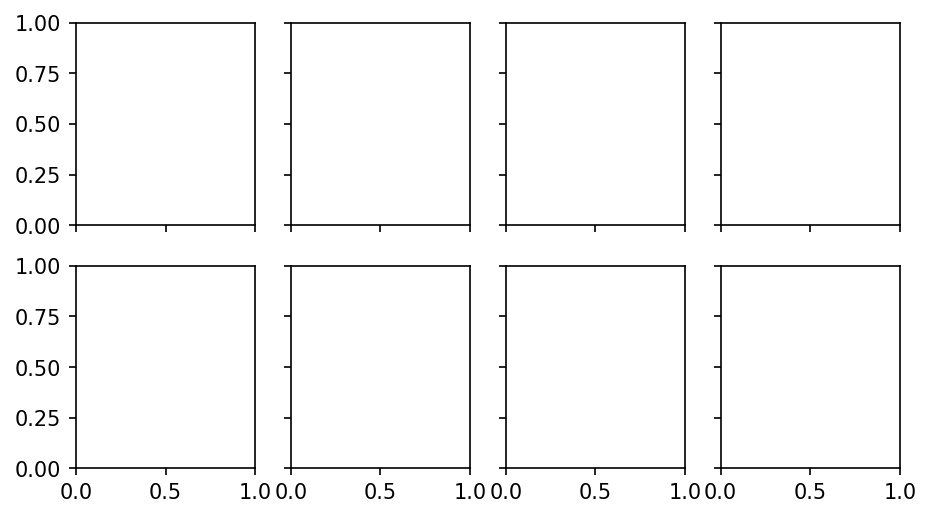

In [123]:
cm = 1 / 2.54
tim = np.arange(-200, 675, step=5) + 12.5
fig, axs = plt.subplots(2, 4, figsize=(18 * cm, 10 * cm), dpi=150, sharey=True, sharex=True, squeeze=False)
axs = axs.flatten()

for ax, category in zip(axs[:4], ['fac', 'bod', 'art', 'nat']):
    X = data['itc'][category]
    Z = X.diagonal(axis1=3, axis2=4).sum(3) / X.sum((3, 4))
    X = data['itc'][category+"0"]
    Z0 = X.diagonal(axis1=3, axis2=4).sum(3) / X.sum((3, 4))

    im = ax.contourf(tim, tim, Z.mean(0)-Z0.mean(0), levels=50, cmap='jet', vmin=0, vmax=.4)
    ax.axis('square')
    ax.set_title(category)
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)

for ax, category in zip(axs[4:], ['fac', 'bod', 'art', 'nat']):
    X = data['pfc'][category]
    Z = X.diagonal(axis1=3, axis2=4).sum(3) / X.sum((3, 4))
    X = data['pfc'][category+"0"]
    Z0 = X.diagonal(axis1=3, axis2=4).sum(3) / X.sum((3, 4))

    im = ax.contourf(tim, tim, Z.mean(0)-Z0.mean(0), levels=50, cmap='jet', vmin=0, vmax=.4)
    # im = ax.contourf(tim, tim, Z, levels=50, cmap='jet', vmin=0)
    ax.axis('square')
    ax.set_title(category)
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)

# plt.colorbar(im, ax=axs.ravel().tolist())
# fig.tight_layout()
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# fig.colorbar(im, cax=cbar_ax)
fig.tight_layout()